# Logarithmic Stock Returns Prediction Using the ARIMA Model

The prices and financial returns of assets and commodities produce what is called time-series. Financial time-series analysis is of great interest to practitioners as well as to theoreticians, for making inferences and predictions. 
<br>
Furthermore, the stochastic uncertainties inherent in financial time-series and the theory needed to deal with them make the subject especially interesting not only to economists, but also to statisticians and physicists.

## Autoregressive Integrated Moving Average

An **autoregressive integrated moving average (ARIMA)** is a statistical model used for the purpose of understanding the data and its properties or to predict future points in the series.

Given a time series of data $X_t$ where $t$ is an integer index and the $X_t$ are real numbers, an ARIMA$\left(p, d, q\right)$ model, with $p$ being the order (number of time lags) of the autoregressive model, $d$ being the degree of differencing (the number of times the data have had past values subtracted), and $q$ being the order of the moving-average model, is given by,

$$\left(1-\sum _{i=1}^{p}\alpha _{i}L^{i}\right)(1-L)^{d}X_{t}=\left(1+\sum _{i=1}^{q}\beta _{i}L^{i}\right)\varepsilon _{t}$$

where $L$ is the lag operator, $LX_{t} = X_{{t-1}}$ for all $t > 1$, the $\alpha _{i}$ are the parameters of the autoregressive part of the model, the $\beta_i$ are the parameters of the moving average part, and the $\varepsilon _{t}$ are error terms. The error terms $\varepsilon _{t}$ are generally assumed to be independent, identically distributed variables sampled from a normal distribution with zero mean. 

A more generalized the above form is,

$$\left(1-\sum _{i=1}^{p}\alpha _{i}L^{i}\right)(1-L)^{d}X_{t}=\delta +\left(1+\sum _{i=1}^{q}\beta _{i}L^{i}\right)\varepsilon _{t}$$

this defines an ARIMA$(p,d,q)$ process with drift ${\frac {\delta }{1-\sum \phi _{i}}}$. 

Some special cases that arise from the ARIMA$(p, d, q)$ are,

- ARIMA$(0,1,0)$, given by $X_{t}=X_{t-1}+\varepsilon _{t}$, which is simply a random walk.
- ARIMA$(0,1,0)$ with a constant, given by $X_{t}=c+X_{t-1}+\varepsilon _{t}$, which is a random walk with drift.
- ARIMA$(0,0,0)$, given by $X_{t}=\varepsilon _{t}$, which is a white noise model.

## Data Preparation 

The data used for the prediction task is Amazon's historical data which covers the period from 8th August, 2018 to 8th August, 2019 having a total number of 252 observations.

In [1]:
# Scientific libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

AMZN = pd.read_csv("AMZN.csv")

AMZN

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-15,1909.550049,1916.209961,1869.790039,1882.619995,1882.619995,7700700
1,2018-08-16,1903.939941,1905.000000,1883.550049,1886.520020,1886.520020,3957100
2,2018-08-17,1885.800049,1888.000000,1855.550049,1882.219971,1882.219971,4104300
3,2018-08-20,1890.569946,1891.750000,1866.060059,1876.709961,1876.709961,2862000
4,2018-08-21,1880.000000,1897.750000,1874.410034,1883.420044,1883.420044,3105600
5,2018-08-22,1876.640015,1905.800049,1876.640015,1904.900024,1904.900024,3080500
6,2018-08-23,1907.170044,1919.500000,1900.760010,1902.900024,1902.900024,3563000
7,2018-08-24,1910.510010,1916.010010,1902.540039,1905.390015,1905.390015,2800900
8,2018-08-27,1915.000000,1927.699951,1909.280029,1927.680054,1927.680054,3569000
9,2018-08-28,1937.729980,1941.780029,1928.819946,1932.819946,1932.819946,3100700


## Statistical Analysis

The plot depicts the original pattern of the series to have general overview of the stationarity of the time series. A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time [**[1]**](https://people.duke.edu/~rnau/411diff.htm).
<br>
The rolling mean of our time series, as shown below, is time varying.

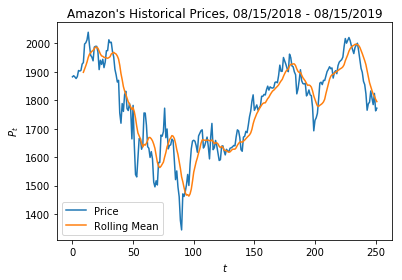

In [2]:
# Visualization
plt.plot(AMZN["Close"], label = "Price")
plt.plot(AMZN["Close"].rolling(10).mean(), label = "Rolling Mean")
plt.xlabel(r'$t$')
plt.ylabel(r'$P_t$')
plt.title("Amazon's Historical Prices, 08/15/2018 - 08/15/2019")
plt.legend()
plt.show()

The rolling standard deviation of the time series is, similarly, time varying.

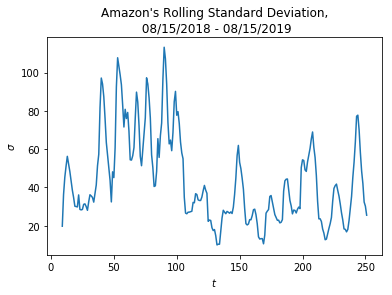

In [3]:
plt.plot(AMZN["Close"].rolling(10).std())
plt.xlabel(r'$t$')
plt.ylabel(r'$\sigma$')
plt.title("Amazon's Rolling Standard Deviation,\n 08/15/2018 - 08/15/2019")
plt.show()

We can further confirm the non-statitionarity of our time series using the **Augmented Dickey–Fuller** test, The hypotheses for the test are:
- **Null Hypothesis $(H_0)$:** If failed to be rejected, it suggests the time series has a **unit root**, meaning it is non-stationary.
- **Alternate Hypothesis $(H_1)$**: The null hypothesis is rejected, it suggests the time series does not have a unit root, meaning it is stationary.

In [4]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey–Fuller test
ADFtest = adfuller(AMZN["Close"])

print('ADF Statistic: %f' % ADFtest[0])
print('p-value: %f' % ADFtest[1])
print('Critical Values:')
for key, value in ADFtest[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.066212
p-value: 0.258316
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


As the test shows us, the ADF Statistic, -2.066212, is greater than the Critical Values, -3.457, -2.873, -2.573, thus our time series is not stationary.

The logarithmic returns are mathematically denoted as,

$$R_t = \frac{\log P_{t + 1}}{P_t} = \log P_{t + 1} - \log P_t$$

the log-retruns of our time series are thus,

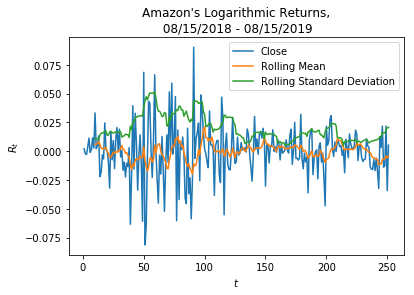

In [5]:
# Log_returns of Amazon stocks
LogReturns = np.log(AMZN["Close"]).diff()

plt.plot(LogReturns)
plt.plot(LogReturns.rolling(10).mean(), label = "Rolling Mean")
plt.plot(LogReturns.rolling(10).std(), label = "Rolling Standard Deviation")
plt.xlabel(r'$t$')
plt.ylabel(r'$R_t$')
plt.title("Amazon's Logarithmic Returns,\n 08/15/2018 - 08/15/2019")
plt.legend()
plt.show()

We check the stationarity of our data using the Augmented Dickey–Fuller test, and we get the following as a result,

In [6]:
ADFtest = adfuller(LogReturns[1:])

print('ADF Statistic: %f' % ADFtest[0])
print('p-value: %f' % ADFtest[1])
print('Critical Values:')
for key, value in ADFtest[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.034703
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


the test shows us, the ADF Statistic, -16.034703, is smaller than the Critical Values, thus our time series can be assumed stationary.

## Prediction Using the ARIMA Model

The ARIMA model is known to be parameterized by 3 parameters, $p$, $d$ and, $q$, choosing the right parameters will lead to better estimation results. For the parameter $q$, we use **autocorrelation** to assign an appropriate value to it [**[2]**](https://people.duke.edu/~rnau/arimrule.htm). 
<br><br>
$$\operatorname {R} _{XX}(\tau)=\mathrm {E} \left[X_{t}{\overline {X_{t + \tau}}}\right]$$
<br>
Where, $\tau = t_2 - t_1$, where $\mathrm {E}$ is the expected value operator and the bar represents complex conjugation. 
<br>
ACF plots display correlation between a series and its lags. In addition to suggesting the order of differencing, ACF plots can help in determining the order of the MA$(q)$ model. After a visual inspection of the below plot we notice a spike at lag with the 0 value, we thus assign our $q$ parameter a value of 0.

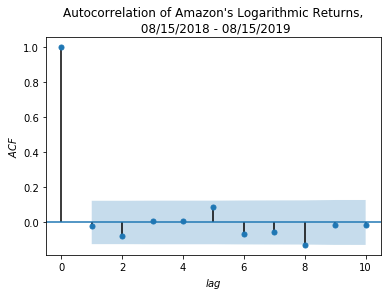

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation
plot_acf(LogReturns[1:], lags=10)
plt.xlabel(r"$lag$")
plt.ylabel(r"$ACF$")
plt.title("Autocorrelation of Amazon's Logarithmic Returns,\n 08/15/2018 - 08/15/2019")
plt.show()

For the parameter $p$, we use **partial autocorrelation** to assign an appropriate value to it [**[3]**](https://people.duke.edu/~rnau/arimrule.htm). As the name suggests, partial autocorrelation displays correlation between a variable and its lags that is not explained by previous lags. PACF plots are useful when determining the order of the AR$(p)$ model. Examining the plot, we assign the $q$ parameter a value of 0.

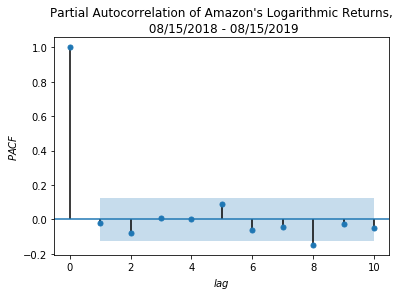

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf

# Partial autocorrelation
plot_pacf(LogReturns[1:], lags=10)
np.seterr()
plt.xlabel(r"$lag$")
plt.ylabel(r"$PACF$")
plt.title("Partial Autocorrelation of Amazon's Logarithmic Returns,\n 08/15/2018 - 08/15/2019")
plt.show()

The table below summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

In [9]:
from statsmodels.tsa.arima_model import ARIMA

# Arima model
model = ARIMA(LogReturns[1:], order=(0, 0, 0))

model_fit = model.fit()
np.seterr()

print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  251
Model:                     ARMA(0, 0)   Log Likelihood                 598.046
Method:                           css   S.D. of innovations              0.022
Date:                Mon, 19 Aug 2019   AIC                          -1192.091
Time:                        11:09:01   BIC                          -1185.040
Sample:                             0   HQIC                         -1189.254
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.171      0.865      -0.003       0.003


We now get a plot of the **residual errors**, suggesting that there may still be some trend information not captured by the model,

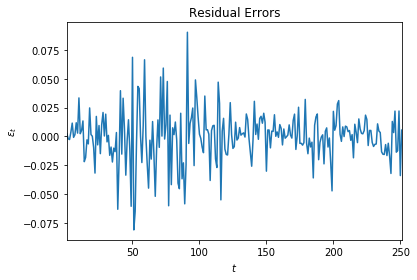

In [10]:
# Residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=None)

plt.xlabel(r'$t$')
plt.ylabel(r'$\varepsilon_t$')
plt.title('Residual Errors')
plt.show()

and get in addition a **density** plot of the **residual error** values.

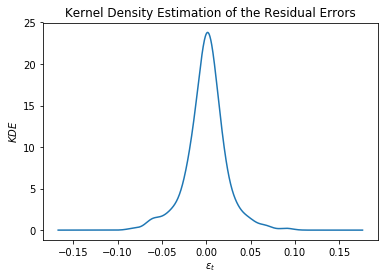

In [11]:
# Kernel density estimation of residual errors
residuals.plot(kind='kde', legend=None)
plt.ylabel(r'$KDE$')
plt.xlabel(r'$\varepsilon_t$')
plt.title('Kernel Density Estimation of the Residual Errors')
plt.show()

Using 'residuals.describe()' we get the statistical properties of the residual errors, and they are as follows, (see below).

In [12]:
print(residuals.describe())

                  0
count  2.510000e+02
mean   1.538257e-10
std    2.237985e-02
min   -8.118286e-02
25%   -9.588590e-03
50%    1.222207e-03
75%    1.045879e-02
max    9.049469e-02


Finally, we use 'model_fit.plot_predict()' funtion and get a forcast of the values.

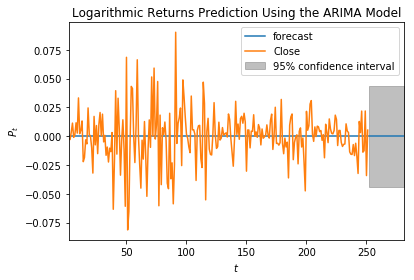

In [13]:
# Log-returns forecast
model_fit.plot_predict(1, 280, dynamic=False)
plt.xlabel(r'$t$')
plt.ylabel(r'$P_t$')
plt.title('Logarithmic Returns Prediction Using the ARIMA Model')
plt.show()

From the above figure, it is clear that our ARIMA$(0, 0, 0)$ model is in need of more adjustment of its parameters for a better fitting of the data and a better forecasting of its future values, one of the methods that helps assess the relative quality of statistical models for a given set of data is the **Akaike information criterion** [**[4]**](https://en.wikipedia.org/wiki/Akaike_information_criterion).

## Bibliography

- **[1]** https://people.duke.edu/~rnau/411diff.htm
- **[2]** https://people.duke.edu/~rnau/arimrule.htm
- **[3]** https://people.duke.edu/~rnau/arimrule.htm
- **[4]** https://en.wikipedia.org/wiki/Akaike_information_criterion